#### Visualising the data

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("dark_background")
sns.set_style("dark")

Reading the dataset

In [2]:
df = pd.read_csv("Datasets/u.data")
df.head()

,196\t242\t3\t881250949
0,186\t302\t3\t891717742
1,22\t377\t1\t878887116
2,244\t51\t2\t880606923
3,166\t346\t1\t886397596
4,298\t474\t4\t884182806


This makes no sense, and we see they are seperated by tabs, hence we use the tab seperator

In [3]:
df = pd.read_csv("Datasets/u.data", sep="\t")
df.head()

,196,242,3,881250949
0,186,302,3,891717742
1,22,377,1,878887116
2,244,51,2,880606923
3,166,346,1,886397596
4,298,474,4,884182806


But there are no headers, hence we have to give our own

In [4]:
df = pd.read_csv("Datasets/u.data", sep="\t", names=["user_id", "item_id", "rating", "timestamp"])
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


Now we have our proper dataset

In [5]:
df.shape

(100000, 4)

In [6]:
# To check unique users
df["user_id"].nunique()

943

In [7]:
# For unique movies
df["item_id"].nunique()

1682

So we have $943$ users, and $1682$ movies

#### Details of these movies are given in the `u.item` file

In [11]:
movies = pd.read_csv("Datasets/u.item", sep="|", encoding='latin-1', header=None)
movies.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
movies.shape

(1682, 24)

We see that we have all the 1682 movie information here, hence we can extract titles from here

In [13]:
# Extracting
movie_titles = movies[[0,1]]
movie_titles.head()

,0,1
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [14]:
movie_titles.columns = ["item_id", "title"]
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


#### `merge()`
- Merges 2 datasets
- Works like `JOIN` in SQL

In [15]:
new_df = pd.merge(df, movie_titles, on="item_id")
new_df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


The titles have been added as required

In [16]:
new_df.tail()

,user_id,item_id,rating,timestamp,title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


### Exploratory Data Analysis

In [20]:
# Checking details group by
new_df.groupby("title").describe()

user_id                                 \
                                        count        mean         std    min   
title                                                                          
'Til There Was You (1997)                 9.0  383.777778  204.272354  152.0   
1-900 (1994)                              5.0  477.000000  244.344020  181.0   
101 Dalmatians (1996)                   109.0  450.330275  295.142779    1.0   
12 Angry Men (1957)                     125.0  453.552000  255.588677    1.0   
187 (1997)                               41.0  517.097561  241.098300    3.0   
...                                       ...         ...         ...    ...   
Young Guns II (1990)                     44.0  504.068182  254.101371   87.0   
Young Poisoner's Handbook, The (1995)    41.0  452.487805  286.352241    7.0   
Zeus and Roxanne (1997)                   6.0  532.833333  343.690219   82.0   
unknown                                   9.0  311.888889  264.160200    1.0   
Á köldum klaka (Cold Fever) (1994)        1.0  655.000000         NaN  655.0   

                                                                  item_id  \
                                         25%    50%    75%    max   count   
title                                                                       
'Til There Was You (1997)              223.0  342.0  530.0  782.0     9.0   
1-900 (1994)                           385.0  405.0  581.0  833.0     5.0   
101 Dalmatians (1996)                  183.0  435.0  699.0  938.0   109.0   
12 Angry Men (1957)                    268.0  429.0  661.0  932.0   125.0   
187 (1997)                             416.0  532.0  698.0  894.0    41.0   
...                                      ...    ...    ...    ...     ...   
Young Guns II (1990)                   301.0  459.0  732.5  943.0    44.0   
Young Poisoner's Handbook, The (1995)  246.0  473.0  634.0  936.0    41.0   
Zeus and Roxanne (1997)                251.5  627.5  796.5  881.0     6.0   
unknown                                130.0  297.0  422.0  833.0     9.0   
Á köldum klaka (Cold Fever) (1994)     655.0  655.0  655.0  655.0     1.0   

                                               ... rating      timestamp  \
                                         mean  ...    75%  max     count   
title                                          ...                         
'Til There Was You (1997)              1300.0  ...    3.0  4.0       9.0   
1-900 (1994)                           1353.0  ...    4.0  4.0       5.0   
101 Dalmatians (1996)                   225.0  ...    4.0  5.0     109.0   
12 Angry Men (1957)                     178.0  ...    5.0  5.0     125.0   
187 (1997)                              330.0  ...    4.0  5.0      41.0   
...                                       ...  ...    ...  ...       ...   
Young Guns II (1990)                   1188.0  ...    3.0  5.0      44.0   
Young Poisoner's Handbook, The (1995)   547.0  ...    4.0  5.0      41.0   
Zeus and Roxanne (1997)                1164.0  ...    3.0  3.0       6.0   
unknown                                 267.0  ...    4.0  5.0       9.0   
Á köldum klaka (Cold Fever) (1994)     1633.0  ...    3.0  3.0       1.0   

                                                                   \
                                               mean           std   
title                                                               
'Til There Was You (1997)              8.861152e+08  5.811350e+06   
1-900 (1994)                           8.797260e+08  3.761163e+06   
101 Dalmatians (1996)                  8.829281e+08  5.575067e+06   
12 Angry Men (1957)                    8.828963e+08  5.403230e+06   
187 (1997)                             8.850084e+08  5.126438e+06   
...                                             ...           ...   
Young Guns II (1990)                   8.821855e+08  4.846823e+06   
Young Poisoner's Handbook, The (1995)  8.821438e+08  5.258286e+06   
Zeus and Roxan

We can see that the columns item_id, timestamp and user_id, are useless in our case, as the stats of these fields mean nothing

In [22]:
new_df.groupby("title").mean()["rating"].sort_values(ascending=False)

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

But this alone is not a good measure, we should have the number of times the movie has been watched too, 2 5 star ratings > 1 5 star rating

In [25]:
new_df.groupby('title').count()["rating"].sort_values(ascending=False)

title
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

This shows that Star Wars has been the most watched movie

In [26]:
mean_ratings = pd.DataFrame(new_df.groupby("title").mean()["rating"])
mean_ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [27]:
mean_ratings["count"] = pd.DataFrame(new_df.groupby("title").count()["rating"])
mean_ratings.head()

,rating,count
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


Now we have a much more exploratory data, giving us count and mean ratings

In [28]:
mean_ratings.sort_values(by="rating", ascending=False)

,rating,count
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


As per our previous logic, Saint of Fort Washington is more likely to be watched than They made me a criminal

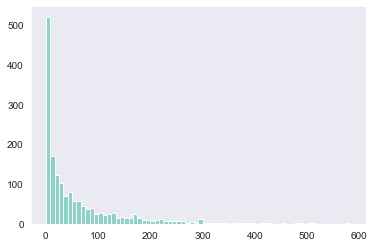

In [32]:
plt.hist(mean_ratings["count"], bins=70)
plt.show()

THis plot shows us the count of movies being watched, we can see after 100, there is a significant decrease

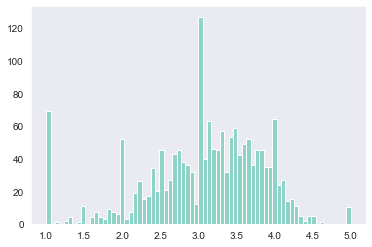

In [33]:
plt.hist(mean_ratings["rating"], bins=70)
plt.show()

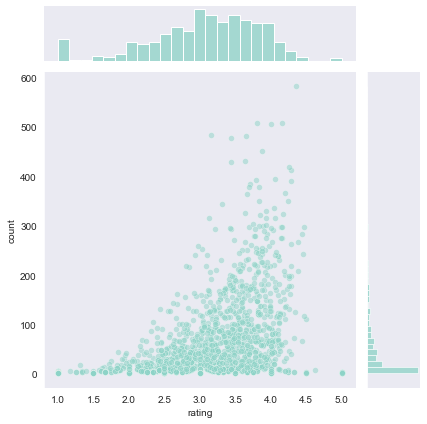

In [36]:
sns.jointplot(x='rating', y="count", data=mean_ratings, alpha=0.5)